Tesla and GameStop Stock and Revenue Analysis



Question 1: Use yfinance to Extract Tesla Stock Data

In [1]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first five rows
tesla_data = tesla_data.reset_index()
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add a User-Agent header to the request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

try:
    response = requests.get(url_tesla, headers=headers)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    soup = BeautifulSoup(response.text, "html.parser")

    tables = soup.find_all('table')
    tesla_revenue_table = None
    for table in tables:
        if 'Tesla Quarterly Revenue' in table.text:
            tesla_revenue_table = table
            break

    dates = []
    revenues = []

    # Check if the table was found before trying to access its contents
    if tesla_revenue_table:
        for row in tesla_revenue_table.find_all('tr')[1:]:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$','').replace(',','')
                # Only append if revenue is not empty
                if revenue:
                    dates.append(date)
                    # Convert revenue to float
                    revenues.append(float(revenue))

        # Create DataFrame only if data was collected
        if dates and revenues:
             tesla_revenue = pd.DataFrame({'Date': pd.to_datetime(dates), 'Revenue': revenues})

            # Display last five rows
             print(tesla_revenue.tail())
        else:
            print("No revenue data found in the table.")

    else:
        print("Table 'Tesla Quarterly Revenue' not found on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

         Date  Revenue
58 2010-09-30     31.0
59 2010-06-30     28.0
60 2010-03-31     21.0
61 2009-09-30     46.0
62 2009-06-30     27.0


Question 3: Use yfinance to Extract GameStop Stock Data

In [4]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first five rows
gme_data = gme_data.reset_index()
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4: Use Webscraping to Extract GameStop Revenue Data

In [6]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add a User-Agent header to the request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

try:
    response = requests.get(url_gme, headers=headers) # Added headers
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    soup = BeautifulSoup(response.text, "html.parser")

    tables = soup.find_all('table')
    gme_revenue_table = None
    for table in tables:
        if 'GameStop Quarterly Revenue' in table.text:
            gme_revenue_table = table
            break

    dates = []
    revenues = []

    # Check if the table was found before trying to access its contents
    if gme_revenue_table:
        for row in gme_revenue_table.find_all('tr')[1:]:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$','').replace(',','')
                # Only append if revenue is not empty
                if revenue:
                    dates.append(date)
                    # Convert revenue to float
                    revenues.append(float(revenue))

        # Create DataFrame only if data was collected
        if dates and revenues:
             gme_revenue = pd.DataFrame({'Date': pd.to_datetime(dates), 'Revenue': revenues})

             # Display last five rows
             print(gme_revenue.tail())
        else:
            print("No revenue data found in the table after parsing.")

    else:
        print("Table 'GameStop Quarterly Revenue' not found on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

         Date  Revenue
60 2010-01-31   3524.0
61 2009-10-31   1835.0
62 2009-07-31   1739.0
63 2009-04-30   1981.0
64 2009-01-31   3492.0


Question 5: Plot Tesla Stock Graph Using make_graph Function

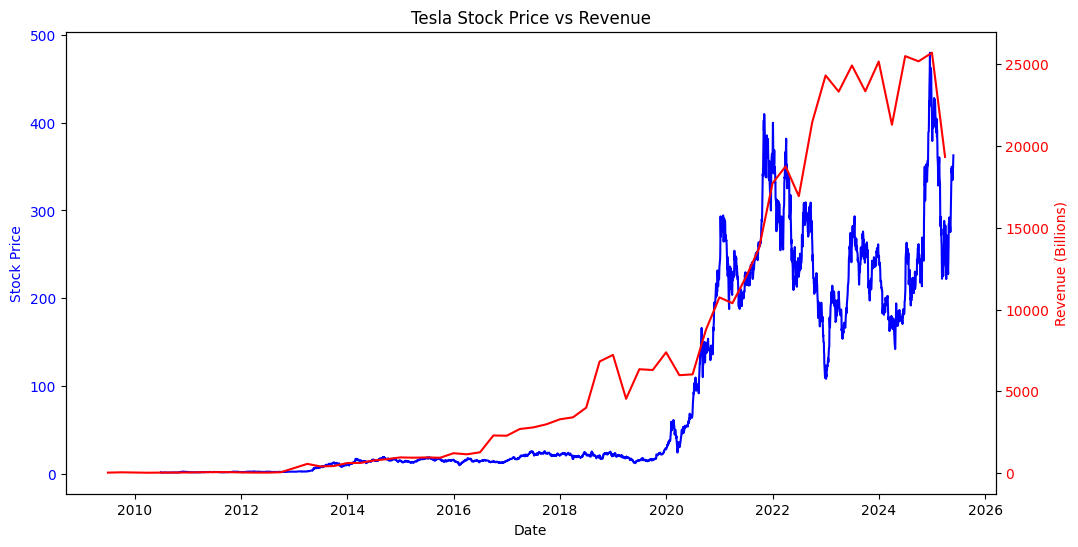

In [7]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (Billions)', color='red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(title)
    plt.show()

# Plot Tesla stock and revenue
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price vs Revenue')


Question 6: Plot GameStop Stock Graph Using make_graph Function

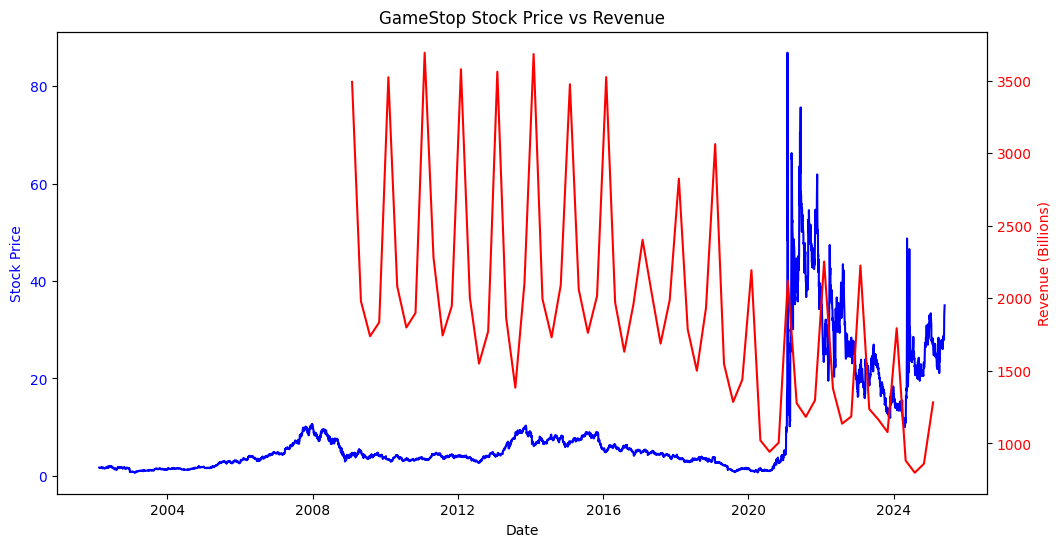

In [8]:
# Plot GameStop stock and revenue
make_graph(gme_data, gme_revenue, 'GameStop Stock Price vs Revenue')
